<a href="https://colab.research.google.com/github/waelrash1/predictive_analytics_DT302/blob/main/SVC_%2BCNN_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Introduction to SVM
1- Explain the concept of Support Vector Machines (SVM). SVM is a supervised machine learning algorithm which can be used for both classification and regression challenges. In this notebook, we focus on classification.



2- Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

3. Loading the Breast Cancer Dataset


In [ ]:
# Load dataset
cancer = datasets.load_breast_cancer()

# Convert to DataFrame
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns=np.append(cancer['feature_names'], ['target']))

4. Data Preprocessing

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Dataset dimensions
print(df.shape)

Splitting the Data


In [ ]:

# Splitting the dataset into a training set and a testing set
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Create SVC Linear  Kernal pipeline


In [ ]:
# Creating a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])


5. Train the pipeline

In [ ]:
# Create a SVM Classifier
# Training the pipeline
pipeline.fit(X_train, y_train)



6. Model Evaluation
Evaluating the Model

In [ ]:


# Making predictions
y_pred = pipeline.predict(X_test)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

In [ ]:
# Classification Report
class_report = classification_report(y_test, y_pred)
print(class_report)

In [ ]:
#Visualizing the Confusion Matrix

sns.heatmap(conf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## Polynomial SVC Kernel

In [ ]:
# Polynomial kernel
poly_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_poly', SVC(kernel='poly', degree=1))  # degree can be adjusted
])
poly_pipeline.fit(X_train, y_train)
y_pred_poly = poly_pipeline.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred_poly))
print(classification_report(y_test, y_pred_poly))


## RBF Kernel

In [ ]:
# RBF kernel
rbf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_rbf', SVC(kernel='rbf'))
])
rbf_pipeline.fit(X_train, y_train)
y_pred_rbf = rbf_pipeline.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, y_pred_rbf))
print(classification_report(y_test, y_pred_rbf))


## SVC Parameter Tuning
Start by explaining the importance of parameter tuning in machine learning models, particularly for SVM. Discuss the parameters:

* C: Regularization parameter. The strength of the regularization is inversely proportional to C. It helps to avoid overfitting.
* Kernel: Specifies the kernel type to be used in the algorithm.
* Gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It defines how far the influence of a single training example reaches.

2. Setting Up Grid Search
First, import the necessary module for Grid Search:

In [ ]:

from sklearn.model_selection import GridSearchCV
# Now, set up the parameter grid to test:

param_grid = {
    'C': [0.1, 1, 10, 100],  # A range of values for C
    'gamma': [1, 0.1, 0.01, 0.001],  # A range of values for gamma
    'kernel': ['linear','rbf', 'poly', 'sigmoid']  # Different kernel types
}



3. Applying Grid Search

Create a GridSearchCV object and fit it to the training data:





In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)


4. Evaluating the Best Model

After fitting, we can check the best parameter combination found by Grid Search:



In [ ]:

print("Best Parameters Found: ", grid.best_params_)


In [ ]:

#Use the best estimator to make predictions:
grid_predictions = grid.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

# Logistic Regression

Importing Logistic Regression
You've already imported necessary libraries. Now, import Logistic Regression from scikit-learn.




In [ ]:
from sklearn.linear_model import LogisticRegression
# Creating a Pipeline for Logistic Regression

# Creating a pipeline for logistic regression
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logistic', LogisticRegression())
])

# Training the logistic regression pipeline
logistic_pipeline.fit(X_train, y_train)

In [ ]:
# Making predictions
y_pred_logistic = logistic_pipeline.predict(X_test)

# Evaluating Logistic Regression Model

# Confusion Matrix for Logistic Regression
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
print(conf_matrix_logistic)

# Classification Report for Logistic Regression
class_report_logistic = classification_report(y_test, y_pred_logistic)
print(class_report_logistic)
# Visualizing the Confusion Matrix for Logistic Regression

sns.heatmap(conf_matrix_logistic, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()



7. Conclusion
Summarize the performance of the model and discuss the results. You can discuss how changing kernel types and tuning parameters can affect the model's performance.

8. Additional Exercises and Resources
Encourage students to try different kernels ('rbf', 'poly', etc.) and play with the C and gamma parameters. Provide links to further reading.

## MNIST Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [ ]:
# Load dataset
digits = datasets.load_digits()

# Displaying the shape of data and target
print("Image Data Shape: ", digits.data.shape)
print("Label Data Shape: ", digits.target.shape)

# Displaying the first few images and labels
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


In [ ]:
# Split data into 70% train and 30% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, test_size=0.3, shuffle=False)


In [ ]:
# Create a classifier: a support vector classifier
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(gamma=0.001))
])

# Fit to the training data
svm_pipeline.fit(X_train, y_train)


In [ ]:
# Predict the value of the digit on the test subset
predicted = svm_pipeline.predict(X_test)


In [ ]:
# Confusion matrix
print(f"Confusion matrix:\n{metrics.confusion_matrix(y_test, predicted)}")

# Classification report
print(f"Classification report for classifier {svm_pipeline}:\n"
      f"{metrics.classification_report(y_test, predicted)}")


## Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV
# Now, set up the parameter grid to test:

param_grid = {
    'C': [0.1, 1, 10, 100],  # A range of values for C
    'gamma': [1, 0.1, 0.01, 0.001],  # A range of values for gamma
    'kernel': ['linear','rbf', 'poly', 'sigmoid']  # Different kernel types
}


In [ ]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
grid.fit(X_train, y_train)

In [ ]:
print("Best Parameters Found: ", grid.best_params_)


In [ ]:

#Use the best estimator to make predictions:
grid_predictions = grid.predict(X_test)

# Evaluate
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

## Experimenting with Banknote Authentication Dataset
Begin by introducing the dataset. The Banknote Authentication Dataset contains images of genuine and forged banknote-like specimens. Features are extracted from these images, such as variance, skewness, curtosis of the wavelet-transformed image, and entropy.






In [ ]:
# Importing Required Libraries and Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import urllib.request

In [ ]:
#Loading the Banknote Authentication Dataset
# The dataset can be downloaded from the UCI Machine Learning Repository. Here's how to do it:


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
urllib.request.urlretrieve(url, "data_banknote_authentication.csv")

In [ ]:
# Read the dataset
df = pd.read_csv("data_banknote_authentication.csv", header=None)
df.columns = ["Variance", "Skewness", "Curtosis", "Entropy", "Class"]
print(df.head())


In [ ]:
# Data Preprocessing
#Exploratory Data Analysis

# Basic stats
print(df.describe())

# Checking for null values
print(df.isnull().sum())

# Class distribution
sns.countplot(df['Class'])
plt.show()


In [ ]:

# Split the data into features and target label
X = df.drop('Class', axis=1)
y = df['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Building and Training the SVM Model

# Creating a SVM Classifier with a radial basis function (rbf) kernel
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='linear'))
])

# Train the model using the training sets
svm_pipeline.fit(X_train, y_train)
# Model Evaluation
# Making Predictions and Evaluating the Model

# Predicting the Test set results
y_pred = svm_pipeline.predict(X_test)

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

# Classification Report
print(classification_report(y_test, y_pred))


7. Experimenting with Different Kernels
Encourage experimentation with different kernels ('linear', 'poly', 'sigmoid') and parameters (C, gamma) to observe their impact on the model's performance.



## The Fashion MNIST Dataset
Start by introducing the dataset. The Fashion MNIST dataset is a collection of 70,000 grayscale images of 10 fashion categories, including shirts, dresses, shoes, etc. Each image is 28x28 pixels. This dataset is often used as a more challenging replacement for the classic MNIST dataset.





In [ ]:
# Importing Required Libraries and Dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf



In [ ]:
# Loading the Fashion MNIST Dataset
# Fashion MNIST can be easily loaded via TensorFlow or Keras:


# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()



In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plotting a few samples from the dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()


In [ ]:

# Normalize the data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Reshape the data to fit the SVM input requirements
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

In [ ]:
# Data Preprocessing
# Since we have already normalized and reshaped the data, no further preprocessing is needed.

# Building and Training the SVM Model
# Given the size of the dataset, consider using a subset of the training data for faster processing, or use a linear kernel for quicker execution.



# Using a linear kernel for quicker execution
svm_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', svm.SVC(kernel='linear'))
])



In [ ]:
# Fit the model (consider using a smaller subset of data for faster processing)
svm_model.fit(X_train[:10000], y_train[:10000]) # Using first 10000 samples for training
# Model Evaluation

# Making predictions
y_pred = svm_model.predict(X_test[:1000]) # Using first 1000 samples for testing

# Confusion Matrix
print(metrics.confusion_matrix(y_test[:1000], y_pred))

# Classification Report
print(metrics.classification_report(y_test[:1000], y_pred))

In [ ]:

#Visualizing the Predictions
#Visualizing predictions can help in understanding where the model performs well or poorly.

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"True: {y_test[i]}, Predicted: {y_pred[i]}")
    ax.set_axis_off()

## CIFAR-10 Dataset
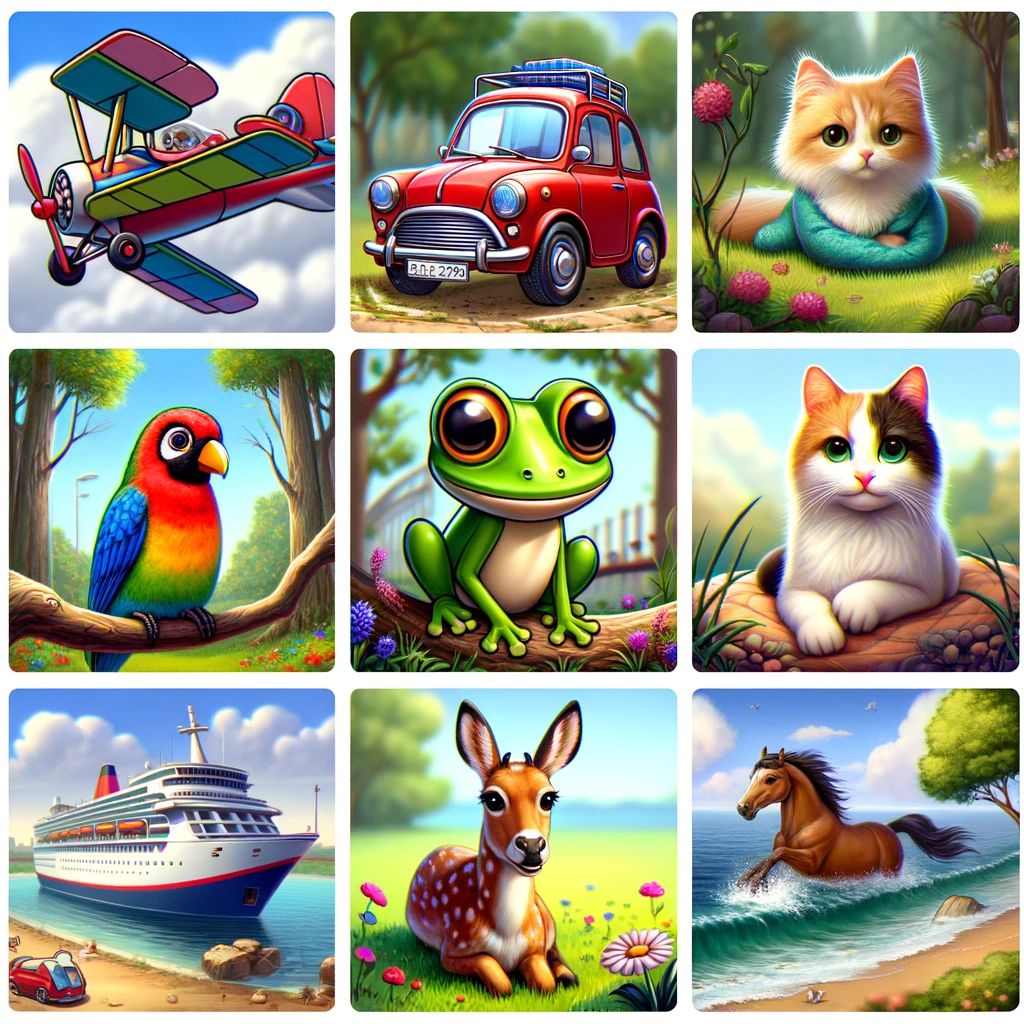

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf


In [ ]:
# Load the CIFAR-10 dataset
(cifar_train_images, cifar_train_labels), _ = tf.keras.datasets.cifar10.load_data()

# Class names in CIFAR-10
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plotting a few sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cifar_train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[cifar_train_labels[i][0]])
plt.show()


In [ ]:
cifar_train_images.shape

In [ ]:
# Load the CIFAR-10 dataset
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the image data
cifar_train_images, cifar_test_images = cifar_train_images / 255.0, cifar_test_images / 255.0



* The reshape function in this context is used to transform the CIFAR-10 image data into a format that is suitable for training with an SVM classifier. Let's break down what this specific reshape operation is doing:

* Original Shape of CIFAR-10 Images: The CIFAR-10 dataset consists of color images with a shape of (32, 32, 3) each. This means each image is 32 pixels in height, 32 pixels in width, and has 3 color channels (Red, Green, Blue).

* Reshaping the Data: The line cifar_train_images.reshape((cifar_train_images.shape[0], -1)) is transforming the shape of the images from a 3D array (num_images, 32, 32, 3) to a 2D array. Here's how it works:

* cifar_train_images.shape[0] refers to the number of images in the training set.
* The -1 in the reshape function is a placeholder that tells Python to calculate the exact number that is necessary based on the length of the array. Essentially, it flattens the 32x32x3 array of each image into a 1D array with 3072 elements (since 32 * 32 * 3 = 3072).
* Result of Reshaping: After reshaping, each image is represented as a single row in the 2D array, with 3072 features (pixels) as columns. This transformation is necessary because the SVM classifier in scikit-learn expects input data in a 2D format, where each row is a sample and each column is a feature.




In [ ]:
cifar_train_images.shape

In [ ]:

# Reshape the data
cifar_train_images = cifar_train_images.reshape((cifar_train_images.shape[0], -1))
cifar_test_images = cifar_test_images.reshape((cifar_test_images.shape[0], -1))

print("Training Set Shape:", cifar_train_images.shape)
print("Test Set Shape:", cifar_test_images.shape)

In [ ]:
# Flatten the labels
cifar_train_labels = cifar_train_labels.flatten()
cifar_test_labels = cifar_test_labels.flatten()

# Taking a subset of data for training (for faster computation)
X_train_subset = cifar_train_images[:10000]
y_train_subset = cifar_train_labels[:10000]

# Applying PCA for dimensionality reduction
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_subset)
X_test_pca = pca.transform(cifar_test_images)


In [ ]:
# SVM Classifier
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train_pca, y_train_subset)


In [ ]:
# Predictions
y_pred = svm_classifier.predict(X_test_pca)

# Confusion Matrix
print(confusion_matrix(cifar_test_labels, y_pred))

# Classification Report
print(classification_report(cifar_test_labels, y_pred))


In [ ]:
# Function to plot images
def plot_images(images, labels, predictions=None):
    assert len(images) == len(labels) == 9

    # Create a grid with 3x3 subplots
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        ax.imshow(np.clip(images[i].reshape(32, 32, 3), 0, 1), cmap='viridis')
        ax.set_xticks([]); ax.set_yticks([])
        lbl = f"True: {labels[i]}"
        if predictions is not None:
            lbl += f"\nPred: {predictions[i]}"
        ax.set_title(lbl)
    plt.tight_layout()
    plt.show()

# Select a few images
sample_images = cifar_test_images[:9]
sample_labels = cifar_test_labels[:9]
sample_predictions = y_pred[:9]

# Plot the sample images
plot_images(sample_images, sample_labels, sample_predictions)


## CNN on CIFAR-10 No pretraining/transfer learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.losses import SparseCategoricalCrossentropy

# Load CIFAR-10 data
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values
cifar_train_images, cifar_test_images = cifar_train_images / 255.0, cifar_test_images / 255.0

# CNN Model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10)
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss=SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

# Train the model
cnn_model.fit(cifar_train_images, cifar_train_labels, epochs=10, validation_data=(cifar_test_images, cifar_test_labels))

# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(cifar_test_images, cifar_test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


## Steps to Implement CNN with Pre-Trained Model on CIFAR-10


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input


In [ ]:
# Load CIFAR-10 data
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values and apply preprocessing required for ResNet50
cifar_train_images = preprocess_input(cifar_train_images)
cifar_train_labels = cifar_train_labels

cifar_test_images = preprocess_input(cifar_test_images)


In [ ]:
#Load Pre-Trained ResNet50 Model:

#Exclude the top (fully connected layers) since CIFAR-10 has different classes than ImageNet.
#Set include_top to False.

base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [ ]:
#Freeze the Base Model Layers:

# This prevents the weights in the pre-trained model from being updated during training.

for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Add Custom Layers for CIFAR-10 Classification:
from tensorflow.keras.regularizers import l2

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Add dropout,
    Dense(512, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Add dropout,
    Dense(128, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.3),  # Add dropout,
     Dense(64, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.5),  # Add dropout,
    Dense(10, activation='softmax')  # CIFAR-10 has 10 classes
])

In [ ]:
#Compile the Model:


model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [ ]:
#Train the Model:
# Set batch size
batch_size = 32

#You might want to use a smaller number of epochs initially to check performance.

model.fit(cifar_train_images, cifar_train_labels,  batch_size=batch_size, epochs=5, validation_data=(cifar_test_images, cifar_test_labels))


In [ ]:
# Evaluate the Model:


loss, accuracy = model.evaluate(cifar_test_images, cifar_test_labels)
print(f"Test accuracy: {accuracy}")

## SVC on feature extracted from resnet

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from sklearn.svm import SVC
# Load and Preprocess CIFAR-10 Data

# Load CIFAR-10 data
(cifar_train_images, cifar_train_labels), (cifar_test_images, cifar_test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values and apply preprocessing required for ResNet152
cifar_train_images = preprocess_input(cifar_train_images)
cifar_test_images = preprocess_input(cifar_test_images)
# Create a Feature Extractor using ResNet152

# Load ResNet152 model pre-trained on ImageNet data
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))



In [ ]:
# Create a feature extractor model
feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('conv5_block3_out').output)
# Extract Features using ResNet50

# Extract features
train_features = feature_extractor.predict(cifar_train_images)
test_features = feature_extractor.predict(cifar_test_images)
# Flatten the Extracted Features

# Flatten the features for SVM
train_features_flat = train_features.reshape(train_features.shape[0], -1)
test_features_flat = test_features.reshape(test_features.shape[0], -1)
# Train an SVM on Top of the Extracted Features



In [ ]:
print(train_features_flat.shape)

In [ ]:
# Initialize and train the SVM
svm_classifier = SVC(kernel='rbf')
svm_classifier.fit(train_features_flat[:10000], cifar_train_labels.flatten()[:10000])
# Evaluate the SVM



In [ ]:
# Make predictions and evaluate
from sklearn.metrics import classification_report, accuracy_score

predictions = svm_classifier.predict(test_features_flat)
print(classification_report(cifar_test_labels.flatten(), predictions))
print(f"Accuracy: {accuracy_score(cifar_test_labels.flatten(), predictions)}")
